#Naive Bayes 1: using the Germany Dataset

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [61]:
#import the dataset
df = pd.read_csv(r'C:\Users\steve\Desktop\Notes\ML\14_naive_bayes\germany.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,0
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,0
3,0,135,68,42,250,42.3,0.365,24,0
4,1,139,62,41,480,40.7,0.536,21,0


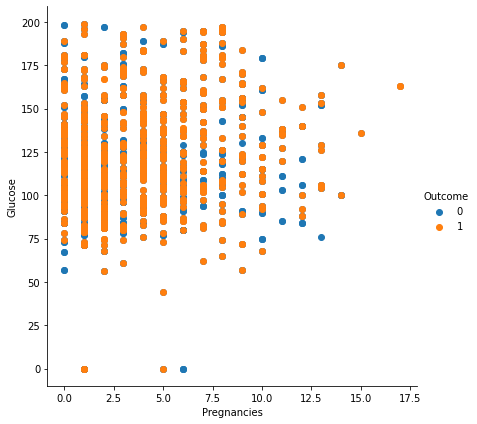

In [62]:
#seaborn datavisualization

sns.FacetGrid(df,hue='Outcome',height=6).map(plt.scatter,'Pregnancies','Glucose').add_legend()


In [63]:
X = df.iloc[:,0:8]
y = df['Outcome']

In [64]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35,0,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,145,0,0,0,44.2,0.630,31
3,0,135,68,42,250,42.3,0.365,24
4,1,139,62,41,480,40.7,0.536,21


In [65]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Outcome, dtype: int64

In [105]:
sc = StandardScaler()
sc

StandardScaler()

In [108]:
#Scaling the dataset
X = sc.fit_transform(X)

In [133]:
#Spliting the data into two parts : Train & Test(Split)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5)

#testSize --> 80% training data and 20% Testing Data

In [121]:
len(X_test) #400 lines for Testing the dataset

1000

In [122]:
len(X_train) #1600 lines for Training the dataset : len = length()

1000

In [123]:
y_test

1151    0
1173    0
1835    1
517     0
503     0
       ..
1432    1
539     0
1099    0
1356    1
538     0
Name: Outcome, Length: 1000, dtype: int64

In [124]:
#Training the Model 

from sklearn.naive_bayes import GaussianNB 

#creating an object of GaussainNB

model = GaussianNB()

#training the data using the fit

model.fit(X_train,y_train)

GaussianNB()

In [125]:
X_test

array([[-0.5153943 , -0.97261071, -0.4767374 , ..., -1.06690552,
        -0.86539266, -0.68659705],
       [-0.21284408,  1.61623525,  0.46156812, ...,  0.19722963,
         1.54285541, -0.17740945],
       [-0.81794452, -1.25332895,  0.25305579, ...,  1.73137423,
         1.93237948, -0.09254485],
       ...,
       [ 0.69480658,  0.80527145,  0.56582429, ..., -0.33051611,
        -0.90558165,  1.43501797],
       [ 0.08970614, -0.37998332, -0.26822506, ...,  0.3199612 ,
         1.34191045, -0.60173245],
       [-1.12049474,  0.18145315,  0.56582429, ...,  0.50405855,
         1.02967289, -0.85632626]])

In [134]:
#Score of the Algorithm
y_pred = model.score(X_test,y_test)

In [135]:
# Now Lets predict the Model
y_pred = model.predict(X_test) 


--> Kappa Score
The Kappa Statistic or Cohen's* Kappa is a statistical measure of inter-rater reliability for categorical variables. In fact, it's almost synonymous with inter-rater reliability. Kappa is used when two raters both apply a criterion based on a tool to assess whether or not some condition occurs.


The sklearn. metrics module implements several loss, score, and utility functions to measure classification performance. Some metrics might require probability estimates of the positive class, confidence values, or binary decisions values.

In [136]:
#this is for the Kappa Score 1. confusion_matrix 2. accuracy_matrix and 3. classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

[[612  46]
 [314  28]]


<AxesSubplot:>

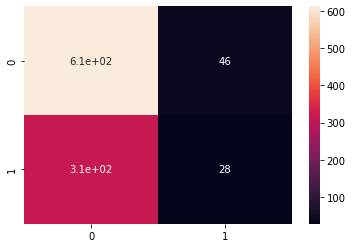

In [149]:
#1.confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot = True)

0.634


<AxesSubplot:>

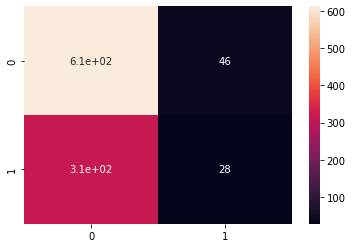

In [150]:
#accuracy score

ac = accuracy_score(y_train,y_pred)
print(ac)
sns.heatmap(cm,annot=True)

              precision    recall  f1-score   support

           0       0.66      0.93      0.77       658
           1       0.38      0.08      0.13       342

    accuracy                           0.64      1000
   macro avg       0.52      0.51      0.45      1000
weighted avg       0.56      0.64      0.55      1000



<AxesSubplot:>

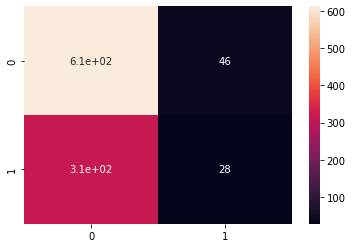

In [152]:
#classification report

cr = classification_report(y_test,y_pred)
print(cr)
sns.heatmap(cm,annot =True)